# Song Sentiment Analysis and Musical Analysis
### Spotify CSVs and Genius API
By Blake Zurman

---

### Loading the `CSV` data sets

In [113]:
import pandas as pd

# Load the Data from both sources.

song_analytics_df = pd.read_csv('30000_spotify_songs.csv')

spotify_df = pd.read_csv('spotify_data_2017_2021.csv')

### Making a data frame for Cold play
Rank Coldplay songs by popularity

In [73]:
import pandas as pd

# Filter the dataset for songs by ColdPlay
coldplay_df = spotify_df[spotify_df['Artist'] == 'Coldplay']

# Group by track_name (or track_id) and calculate the average rank across weeks
coldplay_avg_rank = coldplay_df.groupby('Track').agg({
    'Rank': 'mean',  # Calculate the average rank (lower rank means higher popularity)
}).reset_index()

# Sort the songs by average rank in ascending order (lower rank is better)
coldplay_top_songs = coldplay_avg_rank.sort_values(by='Rank', ascending=True)

# View the top songs
coldplay_top_songs


,Track,Rank
6,Orphans,99.166667
5,Miracles (Someone Special),103.000000
3,Hymn for the Weekend - Seeb Remix,129.222222
1,Christmas Lights,133.166667
4,Hypnotised,157.000000
8,Yellow,170.250000
2,Hymn for the Weekend,184.000000
7,The Scientist,184.913043
0,Adventure of a Lifetime,189.000000


### Making a data frame for Post Malone

Rank Post Malone Songs by popularity

In [76]:
# Filter the dataset for songs by Post Malone
PostMalone_df = spotify_df[spotify_df['Artist'] == 'Post Malone']

# Group by track_name (or track_id) and calculate the average rank across weeks
PostMalone_avg_rank = PostMalone_df.groupby('Track').agg({
    'Rank': 'mean',  # Calculate the average rank (lower rank means higher popularity)
}).reset_index()

# Sort the songs by average rank in ascending order (lower rank is better)
PostMalone_top_songs = PostMalone_avg_rank.sort_values(by='Rank', ascending=True)

# View the top songs
PostMalone_top_songs


,Track,Rank
41,rockstar,5.781250
7,Circles,39.559524
34,Sunflower - Spider-Man: Into the Spider-Verse,41.418605
12,Goodbyes (Feat. Young Thug),60.255319
28,Saint-Tropez,66.615385
35,Take What You Want (feat. Ozzy Osbourne & Trav...,67.684211
23,Otherside,71.750000
22,Only Wanna Be With You - Pokémon 25 Version,74.000000
27,Rich & Sad,75.777778
16,I Know,76.500000


### Making a data frame for Drake

Rank Drake songs by Popularity

In [79]:
# Filter the dataset for songs by Drake
drake_df = spotify_df[spotify_df['Artist'] == 'Drake']

# Group by track_name (or track_id) and calculate the average rank across weeks
drake_avg_rank = drake_df.groupby('Track').agg({
    'Rank': 'mean',  # Calculate the average rank (lower rank means higher popularity)
}).reset_index()

# Sort the songs by average rank in ascending order (lower rank is better)
drake_top_songs = drake_avg_rank.sort_values(by='Rank', ascending=True)

# View the top songs
drake_top_songs

,Track,Rank
15,Don’t Matter To Me,2.666667
78,What’s Next,31.166667
40,Laugh Now Cry Later (feat. Lil Durk),50.911765
72,Time Flies,51.000000
76,Wants and Needs (feat. Lil Baby),52.333333
...,...,...
71,The Motion,173.000000
29,Hotline Bling,177.333333
37,Jumpman,178.666667
75,Trust Issues,179.000000


# Function Defining Section
### This section includes the `Sentiment Analysis` function, and `Music Elements` function

# Data Format **2** 
## & Data Source **3**

I used the Genius API to get song lyrics for further analysis

In [97]:
import lyricsgenius
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set your Genius API access token (replace with your token)
GENIUS_API_TOKEN = "w5BA1mWCTBkcJYJU7kpmHldrJalzImCzMkQraH4eYTOG4su-8pgVEgY_eIzavQBS"

# Set up Genius API client
genius = lyricsgenius.Genius(GENIUS_API_TOKEN)

def get_song_data(song_title, artist_name):
    """
    Fetches song data from Genius API for a specific song title and artist name.
    Returns the song data in a pandas DataFrame containing track name, artist, and lyrics.
    
    Parameters:
    song_title (str): The title of the song.
    artist_name (str): The name of the artist.
    
    Returns:
    pd.DataFrame: A DataFrame containing the song name, artist name, and lyrics.
    """
    # Search for the song by title and artist
    song = genius.search_song(song_title, artist_name)
    
    # If the song is found, extract song details
    if song:
        track_name = song.title
        artist_name = song.artist
        lyrics = song.lyrics
    else:
        track_name = "Song not found"
        artist_name = "Artist not found"
        lyrics = "Lyrics not found"
    
    # Store the song data in a dictionary
    track_info = {
        "track_name": track_name,
        "artist_name": artist_name,
        "lyrics": lyrics
    }
    
    # Convert the track data into a pandas DataFrame
    df = pd.DataFrame([track_info])

    return df


# Sentiment analysis Funct

In [99]:
def analyze_sentiment_vader(df):
    """
    Analyze sentiment of the song's lyrics using VADER sentiment analysis.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing song data with a 'lyrics' column.
    
    Returns:
    str: Sentiment analysis result.
    """
    song_lyrics = df['lyrics'].values[0]  # Take the lyrics from the DataFrame
    
    # Initialize the SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    
    # Get the sentiment scores
    sentiment_score = sid.polarity_scores(song_lyrics)
    
    # Extract the compound score for overall sentiment
    sentiment = sentiment_score['compound']
    
    sentiment_result = f"The sentiment of the song is "
    
    if sentiment > 0:
        sentiment_result += f"positive with a compound score of {sentiment:.2f}."
    elif sentiment < 0:
        sentiment_result += f"negative with a compound score of {sentiment:.2f}."
    else:
        sentiment_result += f"neutral with a compound score of {sentiment:.2f}."
    
    return sentiment_result



# Wordcloud Funct

In [101]:
def create_word_cloud(df):
    """
    Create and display a word cloud from the song's lyrics.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing song data with a 'lyrics' column.
    """
    song_lyrics = df['lyrics'].values[0]  # Take the lyrics from the DataFrame
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(song_lyrics)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # No axes for the word cloud
    plt.title("Word Cloud", fontsize=16)
    plt.show()


# CSV data pull
Uses the CVS with musical information, and pulls relevant data.

In [103]:
def retrieve_music_elements(song_name, song_analytics_df):
    """
    Retrieve the music elements (e.g., danceability, energy, tempo) for a given song from the analytics DataFrame.
    
    Parameters:
    song_name (str): The title of the song.
    song_analytics_df (pd.DataFrame): DataFrame containing song analytics data.
    
    Returns:
    pd.Series: A series with the song's music elements, or an error message if the song is not found.
    """
    # Filter the DataFrame for the song
    song_data = song_analytics_df[song_analytics_df['track_name'] == song_name]
    
    if song_data.empty:
        return f"Song '{song_name}' not found in the dataset."
    
    # List of columns to retrieve
    columns_of_interest = [
        'danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
        'valence', 'tempo'
    ]
    
    # Retrieve the relevant columns for the song
    song_elements = song_data[columns_of_interest].iloc[0]
    
    return song_elements

# Get Song Details
This handy function uses all of the other functions to allow the user to input a song, which will pull from the **Genius API**, pull from the **CSV**s, do `sentiment analysis`, and create a `word cloud`.

In [105]:
def get_song_details(song_name, artist_name, song_analytics_df):
    """
    Fetches song details, performs sentiment analysis, and creates a word cloud.
    
    Parameters:
    song_name (str): The title of the song.
    artist_name (str): The name of the artist.
    song_analytics_df (pd.DataFrame): DataFrame containing song analytics data.
    
    Returns:
    dict: A dictionary containing song details, sentiment analysis, and word cloud.
    """
    # Fetch song data from Genius API and load into DataFrame
    song_df = get_song_data(song_name, artist_name)
    
    # Retrieve music elements using song_analytics_df
    music_elements = retrieve_music_elements(song_name, song_analytics_df)
    
    if isinstance(music_elements, str):  # If no music elements are found (error message)
        return music_elements
    
    # Analyze sentiment
    sentiment_analysis = analyze_sentiment_vader(song_df)
    
    # Create word cloud
    create_word_cloud(song_df)
    
    # Combine both music elements (song details) and sentiment analysis
    song_details = {
        'music_elements': music_elements.to_dict(),
        'sentiment_analysis': sentiment_analysis
    }
    
    return song_details


---
### Runing sentiment analysis and comparing musicality
---
### Coldplay

Searching for "Orphans" by Coldplay...
Done.


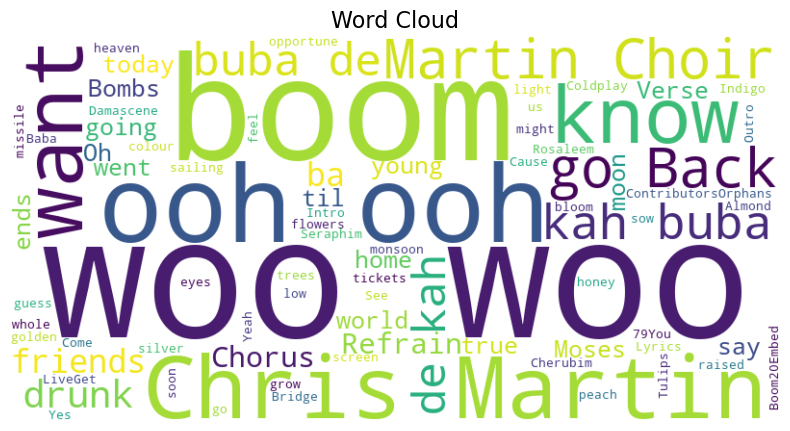

{'music_elements': {'danceability': 0.503,
  'energy': 0.808,
  'key': 11.0,
  'loudness': -5.051,
  'mode': 0.0,
  'speechiness': 0.045,
  'acousticness': 0.0254,
  'instrumentalness': 0.00162,
  'liveness': 0.557,
  'valence': 0.283,
  'tempo': 107.975},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.98.'}

In [107]:
song_name = "Orphans"  # Replace with the song title
artist_name = "Coldplay"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

Searching for "Yellow" by Coldplay...
Done.


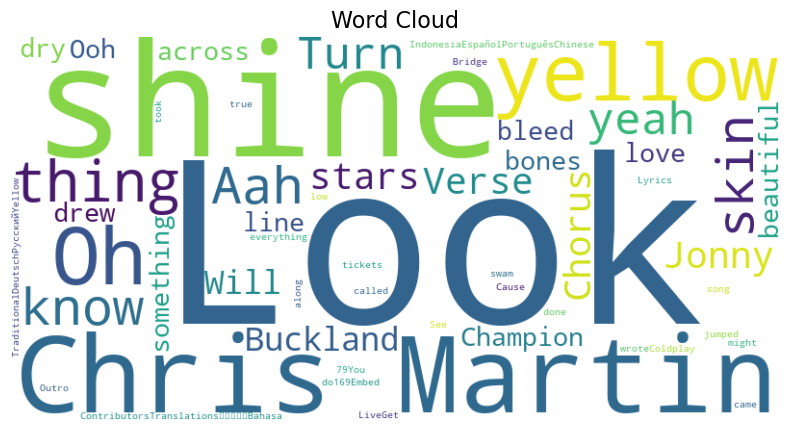

{'music_elements': {'danceability': 0.429,
  'energy': 0.661,
  'key': 11.0,
  'loudness': -7.227,
  'mode': 1.0,
  'speechiness': 0.0281,
  'acousticness': 0.00239,
  'instrumentalness': 0.00013,
  'liveness': 0.234,
  'valence': 0.285,
  'tempo': 173.365},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.97.'}

In [109]:
song_name = "Yellow"  # Replace with the song title
artist_name = "Coldplay"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

---
### Post Malone

Searching for "Circles" by Post Malone...
Done.


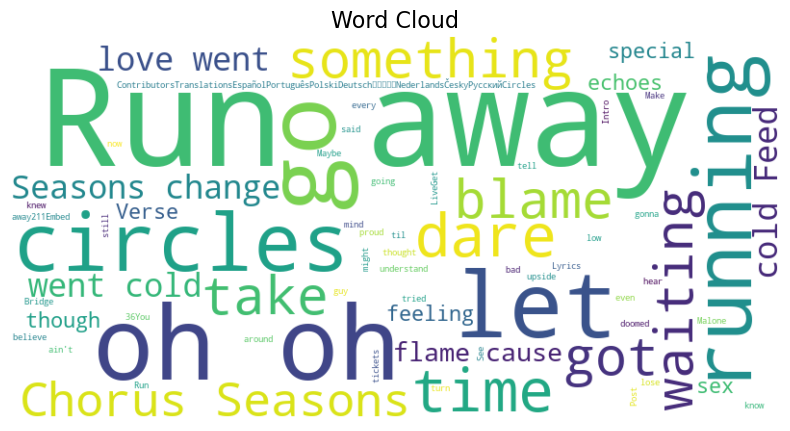

{'music_elements': {'danceability': 0.704,
  'energy': 0.758,
  'key': 0.0,
  'loudness': -3.537,
  'mode': 1.0,
  'speechiness': 0.0402,
  'acousticness': 0.233,
  'instrumentalness': 0.00144,
  'liveness': 0.0924,
  'valence': 0.534,
  'tempo': 120.003},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.96.'}

In [111]:
song_name = "Circles"  # Replace with the song title
artist_name = "Post Malone"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

Searching for "Wow." by Post Malone...
Done.


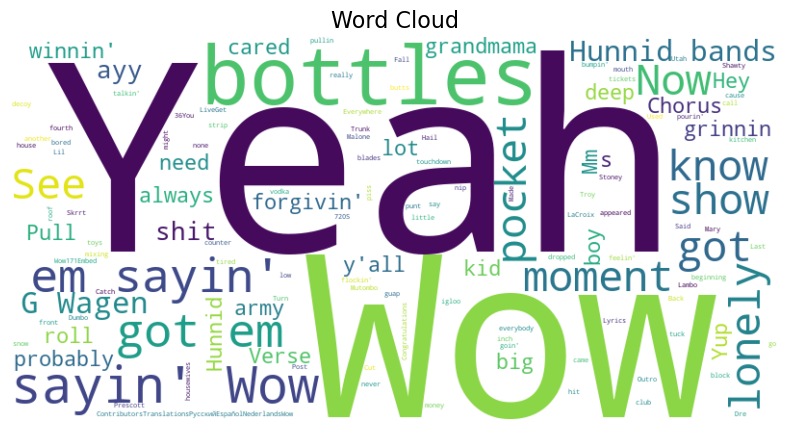

{'music_elements': {'danceability': 0.833,
  'energy': 0.539,
  'key': 11.0,
  'loudness': -7.399,
  'mode': 0.0,
  'speechiness': 0.178,
  'acousticness': 0.163,
  'instrumentalness': 2.1e-06,
  'liveness': 0.101,
  'valence': 0.385,
  'tempo': 99.947},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.25.'}

In [118]:
song_name = "Wow."  # Replace with the song title
artist_name = "Post Malone"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

Searching for "Rockstar" by Post Malone...
Done.


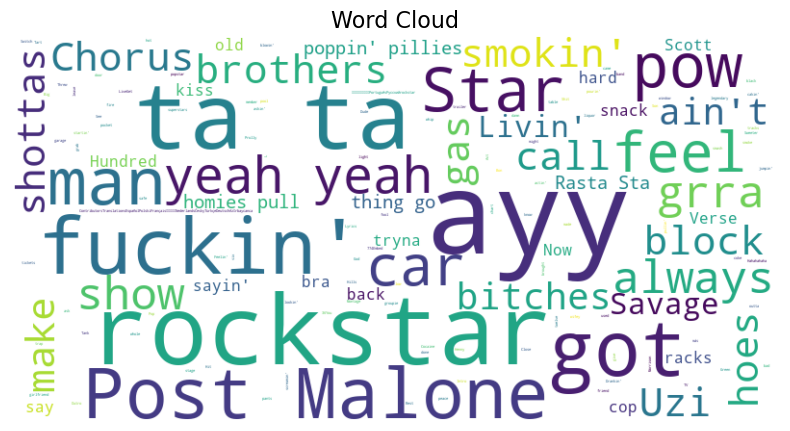

{'music_elements': {'danceability': 0.771,
  'energy': 0.826,
  'key': 11.0,
  'loudness': -3.978,
  'mode': 1.0,
  'speechiness': 0.0604,
  'acousticness': 0.142,
  'instrumentalness': 0.03,
  'liveness': 0.145,
  'valence': 0.185,
  'tempo': 100.012},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.96.'}

In [124]:
song_name = "Rockstar"  # Replace with the song title
artist_name = "Post Malone"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

---
### Drake

Searching for "Hotline Bling" by Drake...
Done.


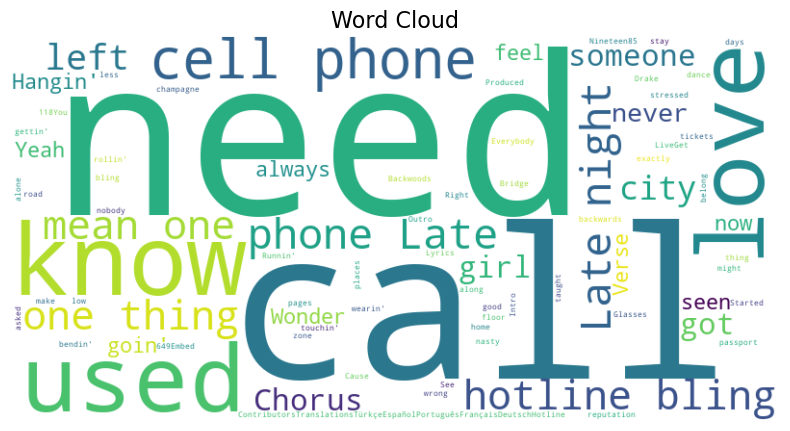

{'music_elements': {'danceability': 0.905,
  'energy': 0.617,
  'key': 2.0,
  'loudness': -8.039,
  'mode': 1.0,
  'speechiness': 0.0596,
  'acousticness': 0.00287,
  'instrumentalness': 0.00044,
  'liveness': 0.0484,
  'valence': 0.572,
  'tempo': 134.972},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.99.'}

In [126]:
song_name = "Hotline Bling"  # Replace with the song title
artist_name = "Drake"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

Searching for "God's Plan" by Drake...
Done.


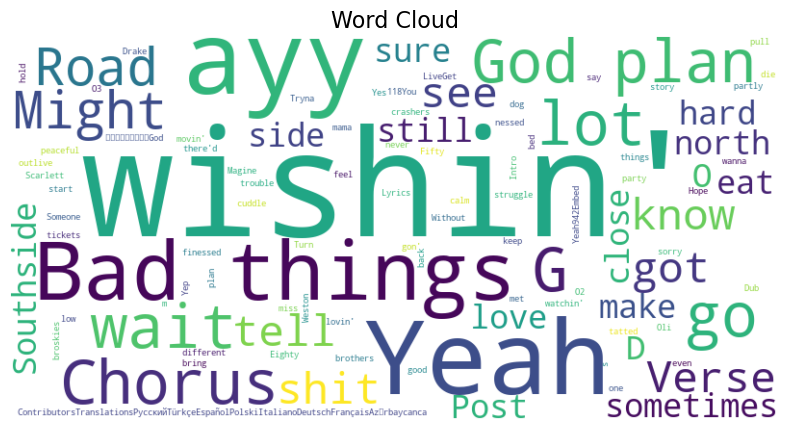

{'music_elements': {'danceability': 0.754,
  'energy': 0.449,
  'key': 7.0,
  'loudness': -9.211,
  'mode': 1.0,
  'speechiness': 0.109,
  'acousticness': 0.0332,
  'instrumentalness': 8.29e-05,
  'liveness': 0.552,
  'valence': 0.357,
  'tempo': 77.169},
 'sentiment_analysis': 'The sentiment of the song is negative with a compound score of -0.81.'}

In [130]:
song_name = "God's Plan"  # Replace with the song title
artist_name = "Drake"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)

Searching for "Jumpman" by Drake...
Done.


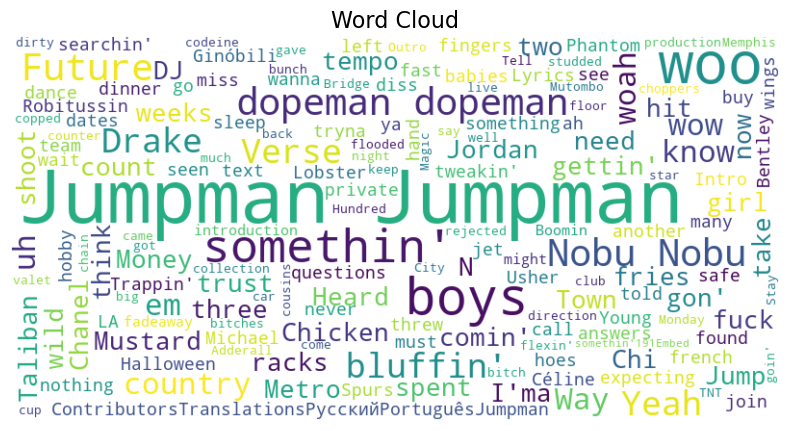

{'music_elements': {'danceability': 0.852,
  'energy': 0.553,
  'key': 1.0,
  'loudness': -7.286,
  'mode': 1.0,
  'speechiness': 0.187,
  'acousticness': 0.0563,
  'instrumentalness': 0.0,
  'liveness': 0.332,
  'valence': 0.656,
  'tempo': 142.072},
 'sentiment_analysis': 'The sentiment of the song is positive with a compound score of 0.99.'}

In [136]:
song_name = "Jumpman"  # Replace with the song title
artist_name = "Drake"  # Replace with the artist name

get_song_details(song_name, artist_name, song_analytics_df)